# WeatherPy_HW_Vojvodic
----
## Note:
Objective is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude * Humidity (%) vs. Latitude * Cloudiness (%) vs. Latitude * Wind Speed (mph) vs. Latitude

## Dependencies and Setup

In [6]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import openweathermapy.core as owm
import pytemperature
import csv
import os
%logstart -o -q output_data/python_log.csv
%logoff

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
csvfile = "cities.csv"
output_path = os.path.join("output_data", "cities.csv")


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Switching logging OFF


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print 'Cities' list to 'cities.csv'
with open(output_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(cities)
        
# Print the city count to confirm sufficient count
len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# citi = cities
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
owm.utils.load_config
settings = {"units": units, "APPID": api_key}
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
weather_response = []
cityList = []
citNam = []
lat = []
temp = []
humi = []
eSea = []
eGnd = []
clouds = []
wind = []
code = []

# for citi in cities:
#     weather_response = owm.find_city(citi, **settings)
#     selection = ('id','coord.lat','coord.lon')
#     data = weather_response(selection)
#     cityList.append(data)
    
# Loop through the list of cities and perform a request for data on each
# for city in cities:
#     response = requests.get(query_url + city).json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
#     cloud.append(response['clouds']['all'])
#     wind.append(response['wind']['speed'])
# logger.disabled = True
# logger.disabled = False

# Write json responses to 'data.json'
with open('output_data/data.json', 'w', encoding='utf-8') as f:
#     Begin loggin with output to 'python_log.csv'
    %logon -o -q
    for city in cities:
        response = requests.get(query_url + city).json()
        json.dump(response, f, ensure_ascii=False, indent=4)  # Write json responses to 'data.json'
        response1=response
        try:    
            print(f"For the city named {(response1['name'])}, ID Number-{(response1['id'])}: LAT={(response1['coord']['lat'])} WIND={(response1['wind']['speed'])} HUMIDITY={(response['main']['humidity'])} TEMP={(response1['main']['temp_max'])} CLOUDINESS={(response1['clouds']['all'])}")
            response1=[]
            citNam.append(response['name']) #and citNam.append(cnt)
            code.append(response['id'])
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp_max'])
            humi.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            eSea.append(response['main']['sea_level'])  # Not used in DataFrame
            eGnd.append(response['main']['grnd_level']) # Not used in DataFrame
        except KeyError:
    #             print(f"The NAME is NO GOOD")
                next
    %logstop
# EXTRA STUFF **************                                                    
# loop throught the list of units and append them to cityList list
# for citi in cities:
#     query_url = f"{url}appid={api_key}&q={citi}"
#     weather_response = requests.get(query_url)
#     response= weather_response.json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
#     cloud.append(response['clouds']['all'])
#     wind.append(response['wind']['speed'])
#     cityList.append(weather_json)
    
#     for city in cities:
#     response = requests.get(query_url + city).json()
#     selection = ('name','id','coord.lat','coord.lon',"main.temp", 'main.temp_max',"main.humidity", "wind.speed",'clouds.all')

Switching logging ON
For the city named Hasaki, ID Number-2112802: LAT=35.73 WIND=6.93 HUMIDITY=78 TEMP=87.01 CLOUDINESS=75
For the city named Bungoma, ID Number-200067: LAT=0.57 WIND=6.87 HUMIDITY=88 TEMP=63.07 CLOUDINESS=100
For the city named Valdivia, ID Number-3868707: LAT=-39.81 WIND=4.7 HUMIDITY=100 TEMP=37.4 CLOUDINESS=0
For the city named Butaritari, ID Number-2110227: LAT=3.07 WIND=10.71 HUMIDITY=71 TEMP=85.19 CLOUDINESS=90
For the city named Ribeira Grande, ID Number-3372707: LAT=38.52 WIND=22.64 HUMIDITY=92 TEMP=73.35 CLOUDINESS=100
For the city named Lavrentiya, ID Number-4031637: LAT=65.58 WIND=5.91 HUMIDITY=94 TEMP=46.76 CLOUDINESS=100
For the city named Flin Flon, ID Number-5954718: LAT=54.77 WIND=5.66 HUMIDITY=53 TEMP=73.71 CLOUDINESS=0
For the city named Pisco, ID Number-3932145: LAT=-13.71 WIND=5.99 HUMIDITY=84 TEMP=61 CLOUDINESS=0
For the city named Dikson, ID Number-1507390: LAT=73.51 WIND=11.27 HUMIDITY=86 TEMP=36.16 CLOUDINESS=43
For the city named Punta Arenas, 

For the city named Coihaique, ID Number-3894426: LAT=-45.58 WIND=5.82 HUMIDITY=80 TEMP=39.2 CLOUDINESS=40
For the city named Hithadhoo, ID Number-1282256: LAT=-0.6 WIND=7.25 HUMIDITY=67 TEMP=83.48 CLOUDINESS=79
For the city named Tiksi, ID Number-2015306: LAT=71.64 WIND=5.82 HUMIDITY=65 TEMP=43.65 CLOUDINESS=22
For the city named Norman Wells, ID Number-6089245: LAT=65.28 WIND=11.41 HUMIDITY=42 TEMP=82.4 CLOUDINESS=20
For the city named Ojinaga, ID Number-3994469: LAT=29.56 WIND=17.22 HUMIDITY=29 TEMP=87.8 CLOUDINESS=1
For the city named Mocuba, ID Number-1024312: LAT=-16.84 WIND=3.27 HUMIDITY=90 TEMP=53.03 CLOUDINESS=0
For the city named Granada, ID Number-3619136: LAT=11.93 WIND=11.41 HUMIDITY=69 TEMP=82.4 CLOUDINESS=20
For the city named Tuktoyaktuk, ID Number-6170031: LAT=69.44 WIND=18.34 HUMIDITY=71 TEMP=55.4 CLOUDINESS=75
For the city named Kapaa, ID Number-5848280: LAT=22.08 WIND=13.87 HUMIDITY=70 TEMP=84.2 CLOUDINESS=75
For the city named Lima, ID Number-3936456: LAT=-12.06 WIN

For the city named Lompoc, ID Number-5367788: LAT=34.64 WIND=10.29 HUMIDITY=77 TEMP=80.01 CLOUDINESS=1
For the city named Roald, ID Number-3141667: LAT=62.58 WIND=2.24 HUMIDITY=100 TEMP=63 CLOUDINESS=0
For the city named Turayf, ID Number-101312: LAT=31.68 WIND=11.41 HUMIDITY=36 TEMP=75.2 CLOUDINESS=0
For the city named Sao Filipe, ID Number-3374210: LAT=14.9 WIND=18.01 HUMIDITY=86 TEMP=73.93 CLOUDINESS=100
For the city named Lao Cai, ID Number-1576303: LAT=22.48 WIND=1.23 HUMIDITY=90 TEMP=69.88 CLOUDINESS=67
For the city named Biak, ID Number-1637001: LAT=-0.91 WIND=4.88 HUMIDITY=74 TEMP=68.72 CLOUDINESS=100
For the city named Sorong, ID Number-1626542: LAT=-0.86 WIND=9.22 HUMIDITY=76 TEMP=81.63 CLOUDINESS=100
For the city named Bonanza, ID Number-3620645: LAT=14.03 WIND=0.31 HUMIDITY=97 TEMP=69.86 CLOUDINESS=100
For the city named Portland, ID Number-4975802: LAT=43.66 WIND=2.59 HUMIDITY=100 TEMP=64 CLOUDINESS=1
For the city named Katobu, ID Number-1640972: LAT=-4.94 WIND=7.72 HUMIDI

For the city named Kurilsk, ID Number-2123979: LAT=45.23 WIND=15.84 HUMIDITY=87 TEMP=59.49 CLOUDINESS=0
For the city named Siavonga, ID Number-898188: LAT=-16.54 WIND=6.06 HUMIDITY=58 TEMP=53.82 CLOUDINESS=0
For the city named Boguchany, ID Number-1509844: LAT=58.38 WIND=1.23 HUMIDITY=44 TEMP=79.04 CLOUDINESS=0
For the city named Xam Nua, ID Number-1652203: LAT=20.42 WIND=1.79 HUMIDITY=93 TEMP=68.92 CLOUDINESS=100
For the city named Mildura, ID Number-2157698: LAT=-34.18 WIND=8.05 HUMIDITY=58 TEMP=59 CLOUDINESS=75
For the city named Pozo Colorado, ID Number-3437443: LAT=-23.49 WIND=10.51 HUMIDITY=69 TEMP=53.71 CLOUDINESS=100
For the city named Nago, ID Number-3172402: LAT=45.88 WIND=5.82 HUMIDITY=73 TEMP=79 CLOUDINESS=0
For the city named Castro, ID Number-3896218: LAT=-42.48 WIND=1.12 HUMIDITY=100 TEMP=35.6 CLOUDINESS=20
For the city named Saint-Leu, ID Number-6690297: LAT=-21.15 WIND=20.8 HUMIDITY=73 TEMP=69.8 CLOUDINESS=75
For the city named Puruliya, ID Number-1259163: LAT=23.33 WI

For the city named Ostrovnoy, ID Number-556268: LAT=68.05 WIND=3.69 HUMIDITY=72 TEMP=52.15 CLOUDINESS=50
For the city named Yeppoon, ID Number-2142316: LAT=-23.13 WIND=2.24 HUMIDITY=44 TEMP=77 CLOUDINESS=0
For the city named Ilulissat, ID Number-3423146: LAT=69.22 WIND=3.06 HUMIDITY=57 TEMP=51.8 CLOUDINESS=75
For the city named Stokmarknes, ID Number-3136690: LAT=68.56 WIND=15.75 HUMIDITY=90 TEMP=57.99 CLOUDINESS=100
For the city named Leningradskiy, ID Number-2123814: LAT=69.38 WIND=15.5 HUMIDITY=77 TEMP=40.54 CLOUDINESS=100
For the city named Teahupoo, ID Number-4033543: LAT=-17.83 WIND=12.75 HUMIDITY=74 TEMP=82.4 CLOUDINESS=20
For the city named Hambantota, ID Number-1244926: LAT=6.12 WIND=10.29 HUMIDITY=83 TEMP=80.6 CLOUDINESS=40
For the city named Soe, ID Number-587876: LAT=57.91 WIND=8.05 HUMIDITY=87 TEMP=57.99 CLOUDINESS=0
For the city named Antofagasta, ID Number-3899539: LAT=-23.65 WIND=9.17 HUMIDITY=58 TEMP=55.4 CLOUDINESS=90
For the city named Port-Gentil, ID Number-2396518:

For the city named Hvide Sande, ID Number-2619537: LAT=56.01 WIND=2.24 HUMIDITY=93 TEMP=59 CLOUDINESS=90
For the city named Sistranda, ID Number-3139597: LAT=63.73 WIND=8.05 HUMIDITY=100 TEMP=66 CLOUDINESS=90
For the city named Kathmandu, ID Number-1283240: LAT=27.71 WIND=4.7 HUMIDITY=100 TEMP=71.6 CLOUDINESS=75
For the city named Te Anau, ID Number-2181625: LAT=-45.41 WIND=0.58 HUMIDITY=71 TEMP=46.49 CLOUDINESS=33
For the city named Nacala, ID Number-1035025: LAT=-14.56 WIND=6.08 HUMIDITY=80 TEMP=58.5 CLOUDINESS=0
For the city named Tiznit, ID Number-2527089: LAT=29.7 WIND=3.8 HUMIDITY=96 TEMP=66.82 CLOUDINESS=5
For the city named Klaksvik, ID Number-2618795: LAT=62.23 WIND=14.99 HUMIDITY=100 TEMP=53.6 CLOUDINESS=100
For the city named Nishihara, ID Number-1850144: LAT=35.74 WIND=3.36 HUMIDITY=78 TEMP=90 CLOUDINESS=75
For the city named College, ID Number-5859699: LAT=64.86 WIND=5.82 HUMIDITY=32 TEMP=84.2 CLOUDINESS=75
For the city named Codrington, ID Number-2160063: LAT=-28.95 WIND=

For the city named Novovarshavka, ID Number-1496633: LAT=54.17 WIND=6.31 HUMIDITY=72 TEMP=65.95 CLOUDINESS=85
For the city named Touho, ID Number-2137873: LAT=-20.78 WIND=7.07 HUMIDITY=55 TEMP=68.26 CLOUDINESS=46
For the city named Faanui, ID Number-4034551: LAT=-16.48 WIND=10.16 HUMIDITY=81 TEMP=79.78 CLOUDINESS=100
For the city named Imeni Poliny Osipenko, ID Number-2023584: LAT=52.42 WIND=8.84 HUMIDITY=90 TEMP=50.33 CLOUDINESS=100
For the city named Muyezerskiy, ID Number-524100: LAT=63.93 WIND=3.51 HUMIDITY=75 TEMP=56.65 CLOUDINESS=100
For the city named San Jeronimo, ID Number-3929607: LAT=-13.65 WIND=2.44 HUMIDITY=91 TEMP=46.78 CLOUDINESS=97
For the city named Denpasar, ID Number-1645528: LAT=-8.65 WIND=8.88 HUMIDITY=67 TEMP=78.43 CLOUDINESS=66
For the city named Miaoli, ID Number-1671971: LAT=24.56 WIND=8.05 HUMIDITY=66 TEMP=93.99 CLOUDINESS=75
For the city named Oriximina, ID Number-3393471: LAT=-1.77 WIND=3.58 HUMIDITY=68 TEMP=80.14 CLOUDINESS=71
For the city named Kuryk, ID N

For the city named El Arenal, ID Number-4011119: LAT=20.78 WIND=5.14 HUMIDITY=73 TEMP=69.8 CLOUDINESS=90
For the city named Cocobeach, ID Number-2401357: LAT=1.01 WIND=4.7 HUMIDITY=88 TEMP=77 CLOUDINESS=20
For the city named Szczytno, ID Number-757357: LAT=53.57 WIND=1.43 HUMIDITY=95 TEMP=60.03 CLOUDINESS=100
For the city named Rock Sound, ID Number-3571592: LAT=24.9 WIND=14.83 HUMIDITY=76 TEMP=83.59 CLOUDINESS=90
For the city named Natchitoches, ID Number-4334720: LAT=31.76 WIND=5.82 HUMIDITY=64 TEMP=75.2 CLOUDINESS=1
For the city named Berdyaush, ID Number-577450: LAT=55.17 WIND=4.07 HUMIDITY=96 TEMP=56.75 CLOUDINESS=47
For the city named Kudryashovskiy, ID Number-1501573: LAT=55.1 WIND=4.47 HUMIDITY=87 TEMP=59 CLOUDINESS=77
For the city named Merrill, ID Number-5572979: LAT=42.03 WIND=17.22 HUMIDITY=29 TEMP=78.8 CLOUDINESS=1
For the city named Iqaluit, ID Number-5983720: LAT=63.75 WIND=5.82 HUMIDITY=86 TEMP=37.4 CLOUDINESS=20
For the city named Zaigrayevo, ID Number-2012735: LAT=51.

In [9]:
#^^^^^ABOVE WILL REQUIRE ABOUT 3 min to Execute^^^^^
# Make sure length of all lists are the same
ls=[citNam, code,  lat, temp, humi, clouds, wind ]
for l in ls:
    print(len(l))


563
563
563
563
563
563
563


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [10]:
# Put data from API response into dictionary for DataFrame
dictionary = {}
dictionary={
    "City" : citNam, 
    "ID Code" : code, 
    "Latitude" : lat, 
    "Temperature" : temp,
    "Humidity" : humi,
    "Cloudiness" : clouds,
    "Wind" : wind
}
# Write DataFrame to CSV 'weather_data_df.csv'
weather_data=pd.DataFrame(dictionary)
export_csv=weather_data.to_csv("output_data/weather_data_df.csv", index=False, header=True)
weather_data.head()

,City,ID Code,Latitude,Temperature,Humidity,Cloudiness,Wind
0,Hasaki,2112802,35.73,87.01,78,75,6.93
1,Bungoma,200067,0.57,63.07,88,100,6.87
2,Valdivia,3868707,-39.81,37.40,100,0,4.70
3,Butaritari,2110227,3.07,85.19,71,90,10.71
4,Ribeira Grande,3372707,38.52,73.35,92,100,22.64


In [11]:
##Quick check of Temperature data distribution
#weather_data['Temperature'].describe()
#mean = 69.26
#median = 70.72
#mode = 86

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
latitude=weather_data['Latitude']
temperature=weather_data['Temperature']
humidity= weather_data['Humidity']
cloudiness= weather_data['Cloudiness']
wind_speed= weather_data['Wind']
today = date.today()

NameError: name 'date' is not defined

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


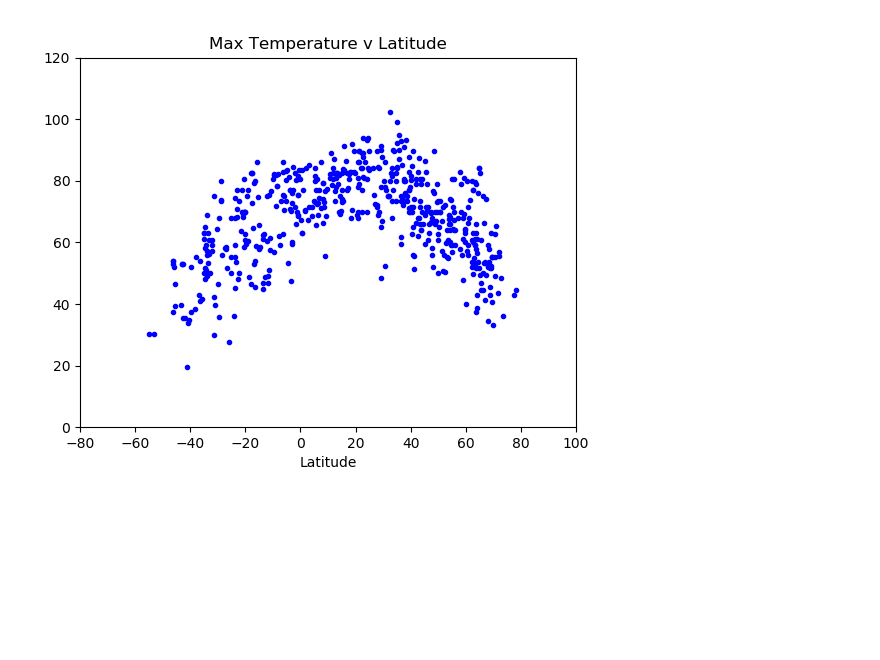

NameError: name 'today' is not defined

In [13]:
fig = plt.figure()
fig1=plt.scatter(latitude, temperature, marker='.', facecolors="blue", edgecolors="blue")
# Set the upper and lower limits of our y axis
plt.ylim(0,120)
# Set the upper and lower limits of our x axis
plt.xlim(-80,100)
# Create a title, x label, and y label for our chart
plt.title("Max Temperature v Latitude")

plt.xlabel("Latitude")
plt.ylabel(f"Temperature (Degrees F) {today}")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("output_data/temp_v_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


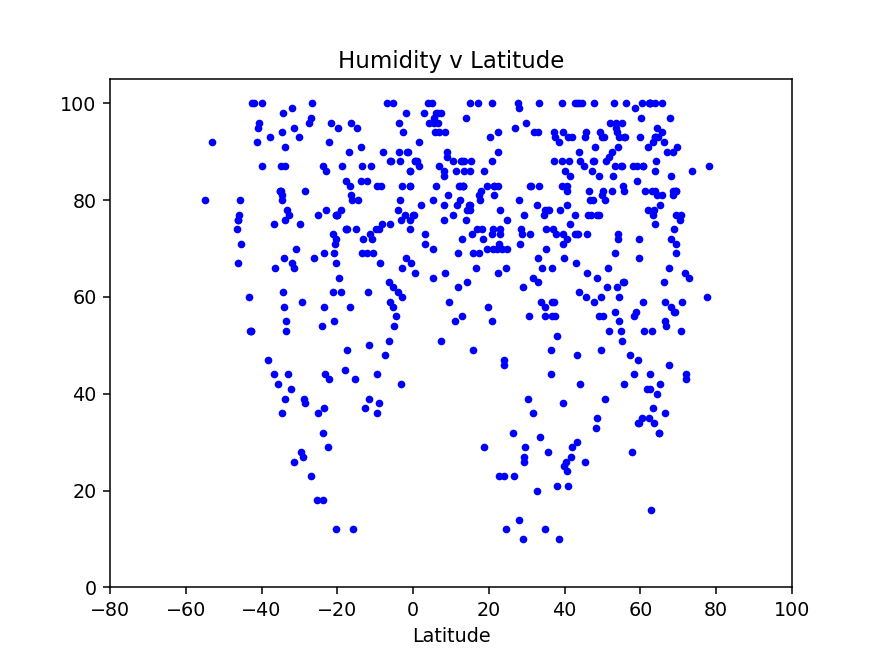

NameError: name 'today' is not defined

In [14]:
fig = plt.figure()
fig1=plt.scatter(latitude, humidity, marker=".", facecolors="blue", edgecolors="blue")
# Set the upper and lower limits of our y axis
plt.ylim(0,105)
# Set the upper and lower limits of our x axis
plt.xlim(-80,100)
# Create a title, x label, and y label for our chart
plt.title("Humidity v Latitude")
plt.xlabel("Latitude")
plt.ylabel(f"Humidity (%) {today}")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("output_data/humidity_v_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


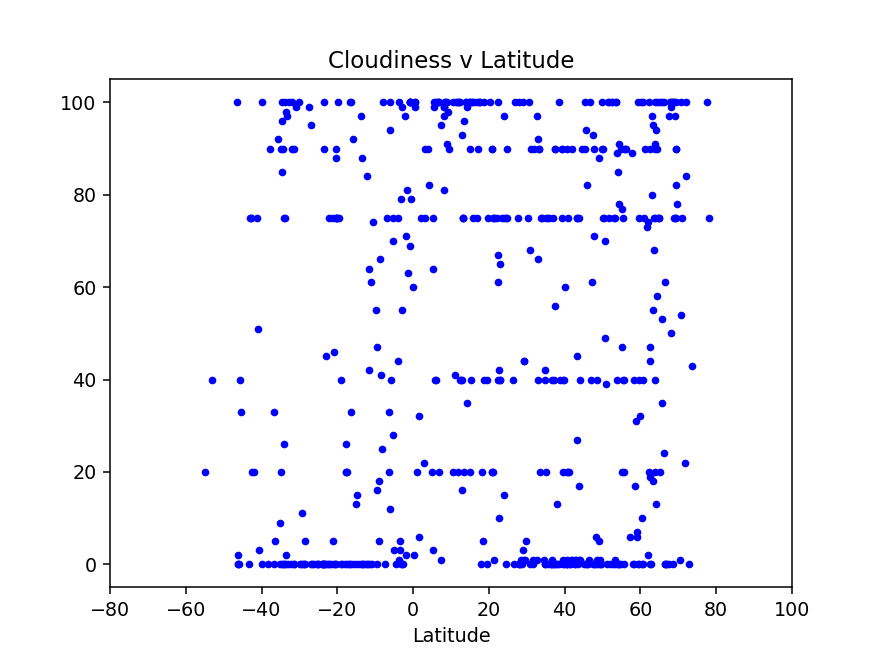

NameError: name 'today' is not defined

In [15]:
fig = plt.figure()
fig1=plt.scatter(latitude, cloudiness, marker=".", facecolors="blue", edgecolors="blue")
# Set the upper and lower limits of our y axis
plt.ylim(-5,105)
# Set the upper and lower limits of our x axis
plt.xlim(-80,100)
# Create a title, x label, and y label for our chart
plt.title("Cloudiness v Latitude")
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness (%) {today}")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("output_data/cloudiness_v_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


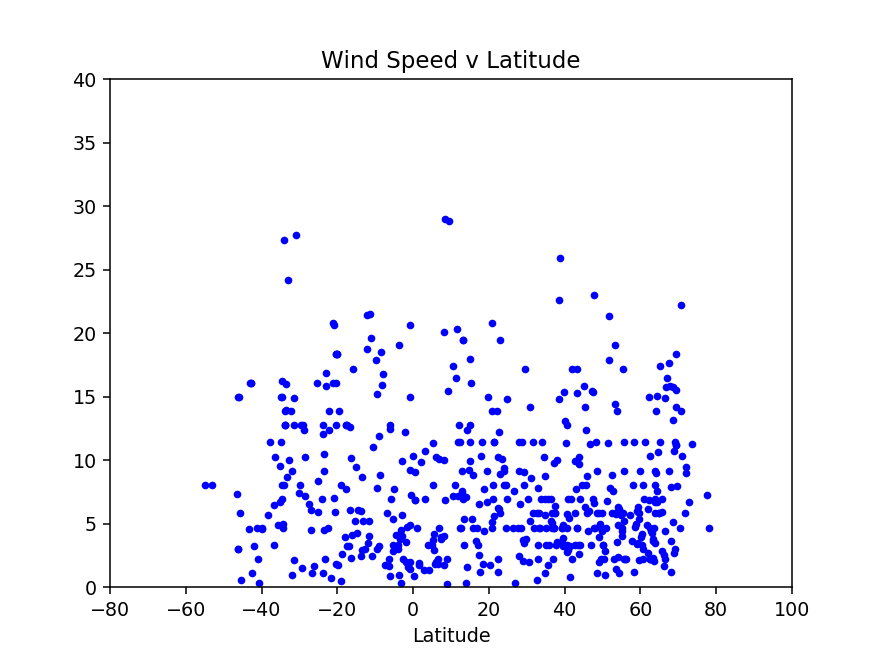

NameError: name 'today' is not defined

In [16]:
fig = plt.figure()
fig1=plt.scatter(latitude, wind_speed, marker=".", facecolors="blue", edgecolors="blue")
# Set the upper and lower limits of our y axis
plt.ylim(0,40)
# Set the upper and lower limits of our x axis
plt.xlim(-80,100)
# Create a title, x label, and y label for our chart
plt.title("Wind Speed v Latitude")
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed (mph) {today}")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("output_data/wind_speed_v_Latitude.png")
plt.show()

# Observable Trends

The following trends are observable in the output scatter plots. These warrant further investigation as there are several possible sources of error that require exclusion/inclusion. While the latitudes and longitudes were generated at random, the subsequent use of CitiPy to generate city names introduces possible selection bias into the city list sample. Also at issue here is the population concentration in the northers and eastern hemispherres.

Methodologically, the city list queried openweather API for current conditions, dropping those city names that produced a response error; another source of uncertainty depending on the cause of the error. 

The data was plotted individually versus latitude, rather than attempting to include cloudcover, wind and humidity in a single analysis. Other available temperature-effecting data, such as elevation, aspect (direction-facing), and distance from water werer omitted entirely.  

Observations:

1)	Temperature v. Latitude scatter plot shows a clear ‘inverted U’ distribution of temperatures, however the axis of symmetry is closer to 30 degrees latitude, rather than 0 degrees as predicted by the ‘hottest at the equator’ theory. 

2)	Humidity v Latitude scatter plot showed the highest values at the equator

3)	Wind Speed v Latitude showed nothing remarkable

4)	Cloudiness v Latitude showed an aggregation of values across all latitudes at 20%, 40%, 75%, and 100%. This may be due to weather prediction shorthand, or possibly have something to do with prevailing winds.

